# Linear Regression Analysis

In this project, we simulate a simple linear relationship between public debt (as a percentage of GDP) and the logarithm of GDP across a set of synthetic countries. The purpose is to demonstrate the application of Ordinary Least Squares (OLS) regression and to visualize the fitted line with its 95% confidence interval.

## Imports

In this cell, we import the Python libraries required for data analysis and visualization:

- **pandas**: used for creating and manipulating tabular data in the form of DataFrames 
- **statsmodels.api**: provides the statistical tools needed to perform the Ordinary Least Squares (OLS) regression and obtain the model summary
- **matplotlib.pyplot**: used to produce visualizations such as scatter plots and fitted regression lines
- **numpy**: provides numerical operations and random number generation used to create synthetic data

We also apply a clean plotting style (`seaborn-whitegrid`) to improve the readability of the charts in the final report

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

## Data generation

In this step, we create a synthetic but realistic dataset that mimics the relationship between a country's public debt (as a percentage of GDP) and its Gross Domestic Product (GDP).

We simulate data for 16 countries, each identified by a code (`C1`, `C2`, …, `C16`):

- The variable `Debt_to_GDP` is generated from a uniform distribution between 40% and 140%
- The variable `log_GDP` (the natural logarithm of GDP) is modeled as a linear function of the debt ratio:
  $$
  \log(GDP) = 26 + 0.005 \times Debt\_to\_GDP + \varepsilon
  $$
  where $\varepsilon$ represents random noise drawn from a normal distribution

We then exponentiate `log_GDP` to obtain the actual GDP values (`GDP_USD`).

This step produces a dataset with a controlled positive correlation between debt and GDP, suitable for demonstrating the linear regression procedure.

In [2]:
np.random.seed(42)

countries = ["C" + str(i) for i in range(1, 17)]
debt_ratio = np.random.uniform(40, 140, size=16)

log_gdp = 26 + 0.005 * debt_ratio + np.random.normal(scale=0.08, size=16)
gdp = np.exp(log_gdp)

df = pd.DataFrame(
    {
        "Country": countries,
        "Debt_to_GDP": debt_ratio,
        "GDP_USD": gdp,
        "log_GDP": log_gdp,
    }
)

print(df.head())

  Country  Debt_to_GDP       GDP_USD    log_GDP
0      C1    77.454012  2.939357e+11  26.406627
1      C2   135.071431  3.299790e+11  26.522295
2      C3   113.199394  3.002867e+11  26.428004
3      C4    99.865848  3.083022e+11  26.454346
4      C5    55.601864  2.383445e+11  26.196983


## Model fitting

In this cell, we apply a simple linear regression model to estimate the relationship between the logarithm of GDP (`log_GDP`) and the public debt ratio (`Debt_to_GDP`).

The model specification is:

$$
\log(GDP_i) = \beta_0 + \beta_1 \times Debt\_to\_GDP_i + \varepsilon_i
$$

where:

- $\beta_0$ is the intercept (baseline level of log(GDP) when debt = 0)
- $\beta_1$ measures the change in log(GDP) for each additional percentage point of debt
- $\varepsilon_i$ is the random error term

We use the Ordinary Least Squares (OLS) method from the `statsmodels` library, which estimates the coefficients by minimizing the sum of squared residuals.

The resulting `summary()` table provides:

- estimated coefficients (`coef`)
- standard errors
- t-statistics and p-values (for significance testing)
- the coefficient of determination $(R^2)$, indicating how much of the variation in $log(GDP)$ is explained by the debt ratio

This output allows us to assess both the strength and the statistical significance of the relationship.

In [3]:
X = sm.add_constant(df["Debt_to_GDP"])
y = df["log_GDP"]
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     61.10
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           1.79e-06
Time:                        15:51:22   Log-Likelihood:                 21.187
No. Observations:                  16   AIC:                            -38.37
Df Residuals:                      14   BIC:                            -36.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.0389      0.049    533.397      

## Visualization of the regression line and confidence interval

This cell produces a scatter plot of the data and overlays the fitted regression line, along with its 95% confidence interval.

Steps performed:

1. A smooth grid of `Debt_to_GDP` values is created using `numpy.linspace()`
2. For each value, the model predicts the corresponding `log(GDP)` and computes the confidence bounds using the `get_prediction()` method from `statsmodels`
3. The following graphical elements are then displayed:

   - **Blue points**: observed data for each country
   - **Orange line**: fitted regression line (`OLS fit`)
   - **Shaded orange area**: 95% confidence interval around the fitted line
   - **Country labels**: added next to each point for interpretability

The plot provides an intuitive visual understanding of the estimated relationship and the associated uncertainty. In this synthetic dataset, the upward-sloping line confirms a positive correlation
between public debt and GDP in logarithmic scale.

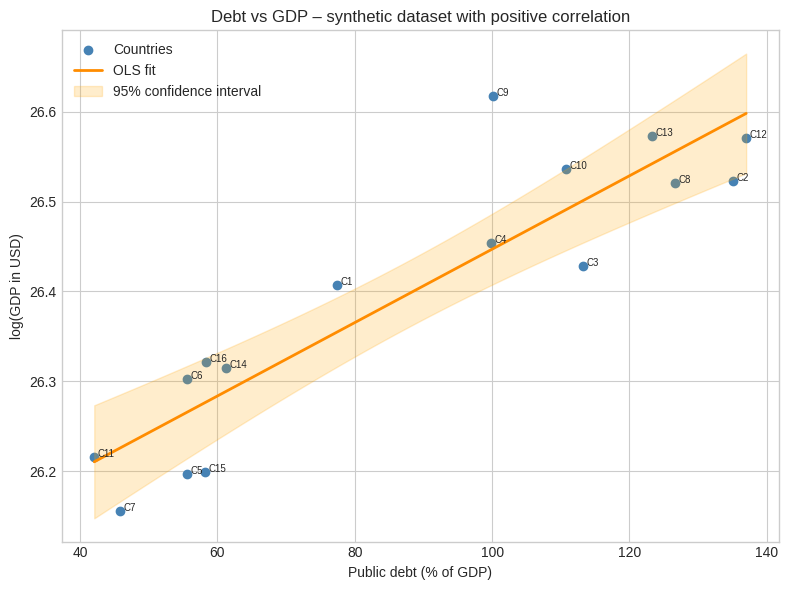

In [4]:
x_line = np.linspace(df["Debt_to_GDP"].min(), df["Debt_to_GDP"].max(), 100)
X_pred = sm.add_constant(x_line)
pred = model.get_prediction(X_pred).summary_frame(alpha=0.05)

plt.figure(figsize=(8, 6))
plt.scatter(df["Debt_to_GDP"], df["log_GDP"], color="steelblue", label="Countries")
plt.plot(x_line, pred["mean"], color="darkorange", linewidth=2, label="OLS fit")
plt.fill_between(
    x_line,
    pred["mean_ci_lower"],
    pred["mean_ci_upper"],
    color="orange",
    alpha=0.2,
    label="95% confidence interval",
)

for _, row in df.iterrows():
    plt.text(row["Debt_to_GDP"] + 0.5, row["log_GDP"], row["Country"], fontsize=7)

plt.xlabel("Public debt (% of GDP)")
plt.ylabel("log(GDP in USD)")
plt.title("Debt vs GDP – synthetic dataset with positive correlation")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation of results

The estimated coefficient $\beta_1$ represents the expected change in the logarithm of GDP for a one–percentage–point increase in the debt-to-GDP ratio.

Since the dependent variable is in logarithmic form, $\beta_1$ can be approximately interpreted as a percentage change in GDP. For example, if $\beta_1 = 0.005$, it means that an increase of 1 percentage point in debt/GDP
is associated with an estimated 0.5% increase in GDP (in this synthetic model).

The regression summary also provides:

- the **p-value**, which indicates whether the estimated coefficient is statistically significant;
- the **R-squared**, showing the proportion of variation in `log(GDP)` explained by the debt ratio.

The plot visually confirms this positive linear relationship, and the 95% confidence band illustrates the uncertainty surrounding the fitted line. Overall, this example demonstrates the standard workflow of a simple linear regression: data generation, model estimation, and interpretation of statistical and graphical results.

## Automatic textual interpretation

This optional cell extracts the estimated regression coefficient $(\beta_1)$ and the corresponding p-value from the fitted model and generates an automatic, human-readable interpretation.

Specifically:

- `beta1` stores the estimated slope coefficient associated with `Debt_to_GDP`;
- `pval` stores its p-value, indicating statistical significance;
- the formatted output expresses the estimated percentage change in GDP corresponding to a 1-point increase in the debt-to-GDP ratio.

This cell is useful for producing a concise textual summary that can be directly included in a written report or presentation slide.

In [5]:
beta1 = model.params["Debt_to_GDP"]
pval = model.pvalues["Debt_to_GDP"]
print(f"Estimated coefficient: {beta1:.4f}")
print(
    f"Interpretation: A 1% increase in debt/GDP corresponds to an estimated {beta1*100:.2f}% increase in GDP."
)
print(f"p-value: {pval:.3f}")

Estimated coefficient: 0.0041
Interpretation: A 1% increase in debt/GDP corresponds to an estimated 0.41% increase in GDP.
p-value: 0.000
